In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [177]:
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import to_forecasting
rpy.set_seed(42)

In [178]:
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error

In [179]:
def plotfig(a, b, c, time, sinal, Label, cor, xlabel, ylabel, title):
    plt.figure(figsize=(12,6))
    plt.subplot(a, b, c)  # (n_linhas, n_colunas, índice)
    plt.plot(time, sinal, label=Label, color=cor)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

def NRMSE(y, y_esn):
    y_min = np.min(y)
    y_max = np.max(y)
    nrmse = np.sqrt( (1/len(y) * np.sum( np.abs((y-y_esn)/(y_max-y_min) )**2 ) ) )   
    return(nrmse) 

# APRBS

In [180]:
# Parâmetros do sinal 
t_final, dt = 500, 0.1               # final e tempo de amostragem
t = np.arange(0, t_final, dt)
min_step, max_step = 60/60, 600/60 # tempo entre trocas

Input 1

In [181]:
#  APRBS
min_value_fi, max_value_fi = 5, 20   # limites
Fi = np.zeros_like(t)

current_value = np.random.uniform(min_value_fi, max_value_fi)
time_next_change = 0

for i in range(len(t)):
    if t[i] >= time_next_change:
        current_value = np.random.uniform(min_value_fi, max_value_fi)
        time_next_change = t[i] + np.random.uniform(min_step, max_step)
        #print(time_next_change-t[i])
    Fi[i] = current_value


Input 2

In [182]:
#  APRBS
min_value_fv, max_value_fv = 5, 30   # limites
Fv = np.zeros_like(t)

current_value = np.random.uniform(min_value_fv, max_value_fv)
time_next_change = 0

for i in range(len(t)):
    if t[i] >= time_next_change:
        current_value = np.random.uniform(min_value_fv, max_value_fv)
        time_next_change = t[i] + np.random.uniform(min_step, max_step)
        #print(time_next_change-t[i])
    Fv[i] = current_value

Export CSV

In [183]:
Entradas = pd.DataFrame({
    "f(Hz)": Fi,
    "Zc(%)": Fv
}) 
Entradas.to_csv("Input_JT_BCS.csv", index=False)

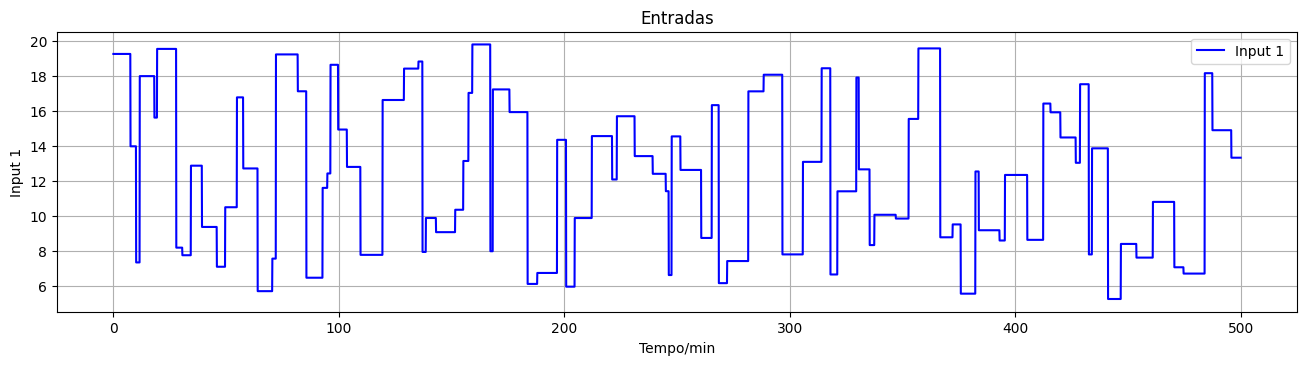

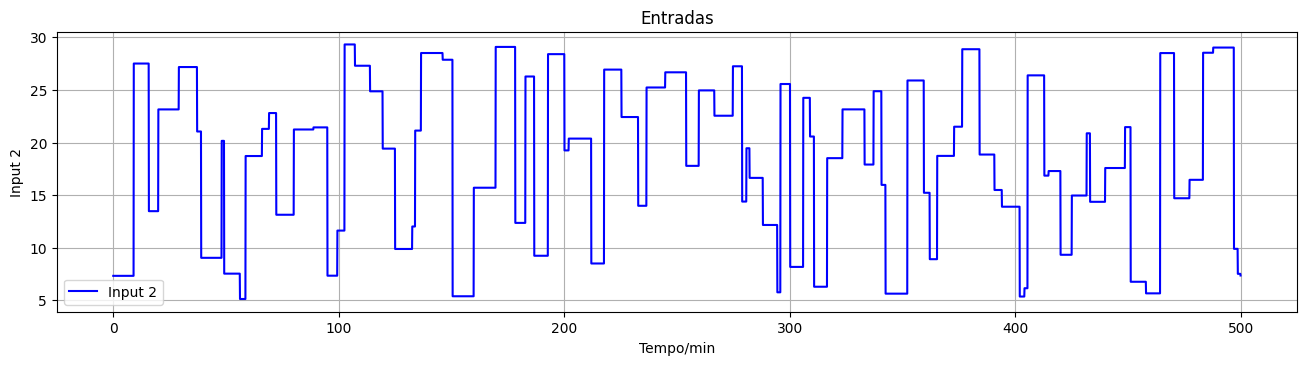

In [184]:
plt.figure(figsize=(16,8))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t, Fi, label="Input 1", color='b')
plt.ylabel("Input 1")
plt.xlabel("Tempo/min")
plt.title("Entradas")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t, Fv, label="Input 2", color='b')
plt.ylabel("Input 2")
plt.xlabel("Tempo/min")
plt.title("Entradas")
plt.grid(True)
plt.legend()
plt.show()

Import MATLAB

In [185]:
Saidas = pd.read_excel("Saidas_xlsx.xlsx")
Saidas = Saidas.to_numpy()
Entradas = Entradas.to_numpy()
L = Saidas[:,0].reshape(-1,1)
T = Saidas[:,1].reshape(-1,1)
print(L.shape)
print(T.shape)

(5000, 1)
(5000, 1)


Normalização

In [186]:
scaler_in = MinMaxScaler(feature_range=(-1, 1))
Entradas_norm = scaler_in.fit_transform(Entradas)   # entradas normalizadas

scaler_out = MinMaxScaler(feature_range=(-1, 1))
Saidas_norm = scaler_out.fit_transform(Saidas)   # saídas normalizadas

Divisão de Dados

In [187]:
# Treino 
X_train, Y_train = Entradas_norm[:2500], Saidas_norm[:2500]
# Teste
X_test, Y_test = Entradas_norm[2500:], Saidas_norm[2500:]

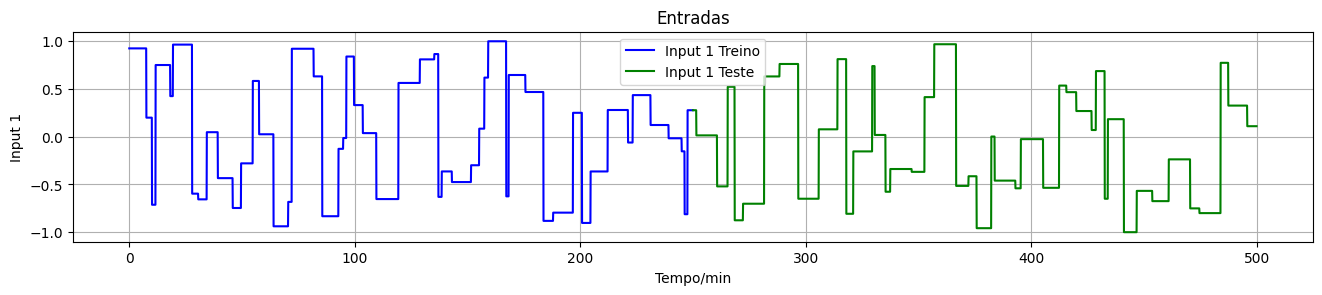

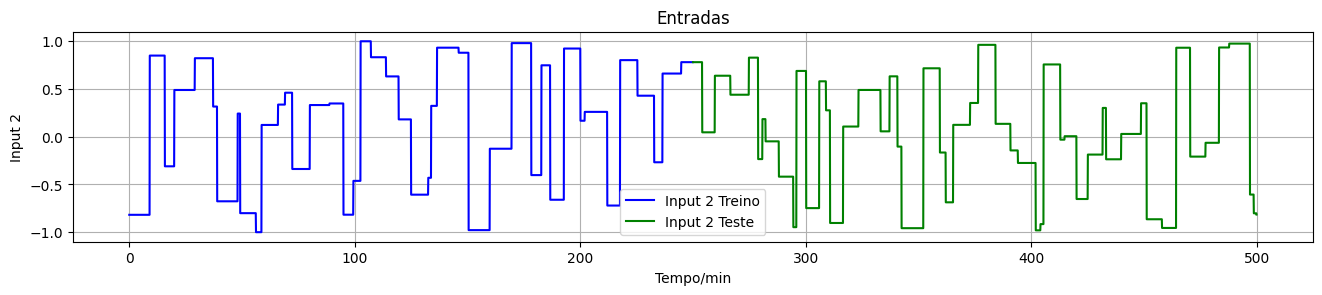

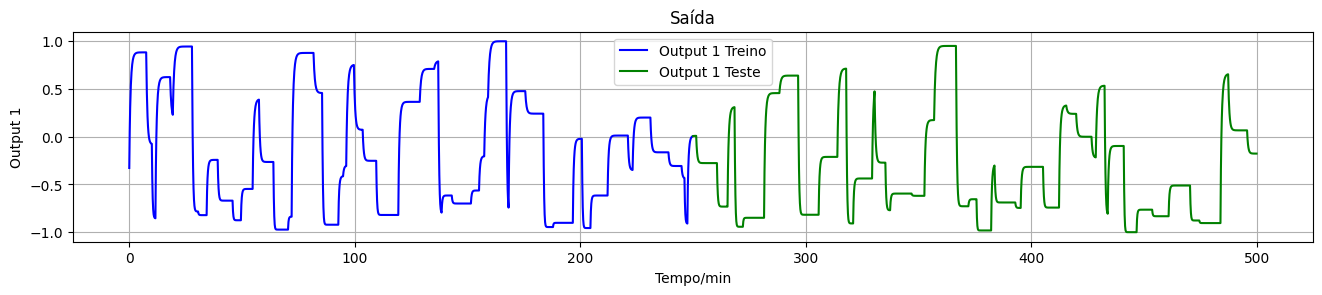

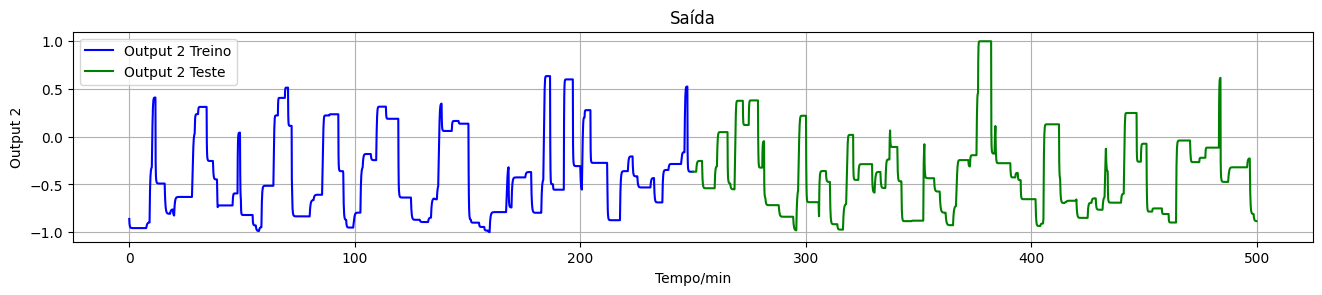

In [188]:
t_a = np.arange(0, t_final/2, dt)
t_b = np.arange(t_final/2 ,t_final, dt)

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, X_train[:,0], label="Input 1 Treino", color='b')
plt.plot(t_b, X_test[:,0], label="Input 1 Teste", color='g')
plt.ylabel("Input 1")
plt.xlabel("Tempo/min")
plt.title("Entradas")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, X_train[:,1], label="Input 2 Treino", color='b')
plt.plot(t_b, X_test[:,1], label="Input 2 Teste", color='g')
plt.ylabel("Input 2")
plt.xlabel("Tempo/min")
plt.title("Entradas")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, Y_train[:,0], label="Output 1 Treino", color='b')
plt.plot(t_b, Y_test[:,0], label="Output 1 Teste", color='g')
plt.ylabel("Output 1")
plt.xlabel("Tempo/min")
plt.title("Saída")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, Y_train[:,1], label="Output 2 Treino", color='b')
plt.plot(t_b, Y_test[:,1], label="Output 2 Teste", color='g')
plt.ylabel("Output 2")
plt.xlabel("Tempo/min")
plt.title("Saída")
plt.grid(True)
plt.legend()
plt.show()

# Modelo

In [189]:
R2_1, R2_2 = 0, 0
i = 0
melhor_R2 = -1
melhor_param = {}

while (R2_1 < 0.85 or R2_2 < 0.9) and i < 3000:
    # Definindo parâmetros
    # seed = int(np.random.uniform(1, 100))
    units = int(np.random.uniform(10,500))
    alpha = np.random.uniform(0, 1)
    raio = np.random.uniform(0, 1)
    #raio = 0.9

    # Gerando modelo
    #rpy.set_seed(int(seed))
    reservoir = Reservoir(units, lr = alpha, sr = raio)

    readout = Ridge(ridge=1e0)
    BCS_model = reservoir >> readout

    # Treino
    BCS_model = BCS_model.fit(X_train, Y_train, warmup=0)
    #print(reservoir.initialized, readout.initialized)

    # Teste
    Y_pred = BCS_model.run(X_test)
    R2_1 = r2_score(Y_test[:,0], Y_pred[:,0])
    R2_2 = r2_score(Y_test[:,1], Y_pred[:,1])
    R2  = [R2_1, R2_2]

    rmse_p = NRMSE(Y_test[:,0], Y_pred[:,0])
    rmse_h = NRMSE(Y_test[:,1], Y_pred[:,1])
    nrmse = [float(rmse_p), float(rmse_h)]
    
    print(f"Iteração {i+1:03d} | R²(P)={R2_1:.3f} | R²(H)={R2_2:.3f}")

    # Melhor modelo
    if (R2_1 + R2_2)/2 > melhor_R2:
        melhor_R2 = (R2_1 + R2_2)/2
        melhor_param = {
            #"seed": seed,
            "units": units,
            "alpha": alpha,
            "raio": raio,
            "R²": R2,
            "NRMSE": nrmse,
            "Iteração": i+1
        }
    i+=1
print("----------------------------------------\nMelhor modelo encontrado:")
for k, v in melhor_param.items():
    print(f"{k}: {v}")

Iteração 001 | R²(P)=0.972 | R²(H)=0.842
Iteração 002 | R²(P)=-0.238 | R²(H)=0.495
Iteração 003 | R²(P)=0.969 | R²(H)=0.847
Iteração 004 | R²(P)=0.971 | R²(H)=0.848
Iteração 005 | R²(P)=0.973 | R²(H)=0.845
Iteração 006 | R²(P)=0.964 | R²(H)=0.849
Iteração 007 | R²(P)=0.963 | R²(H)=0.843
Iteração 008 | R²(P)=0.968 | R²(H)=0.849
Iteração 009 | R²(P)=0.947 | R²(H)=0.834
Iteração 010 | R²(P)=0.970 | R²(H)=0.844
Iteração 011 | R²(P)=0.962 | R²(H)=0.844
Iteração 012 | R²(P)=-0.240 | R²(H)=0.491
Iteração 013 | R²(P)=0.972 | R²(H)=0.846
Iteração 014 | R²(P)=0.971 | R²(H)=0.849
Iteração 015 | R²(P)=0.970 | R²(H)=0.844
Iteração 016 | R²(P)=0.971 | R²(H)=0.845
Iteração 017 | R²(P)=0.959 | R²(H)=0.828
Iteração 018 | R²(P)=0.968 | R²(H)=0.842
Iteração 019 | R²(P)=0.964 | R²(H)=0.825
Iteração 020 | R²(P)=0.962 | R²(H)=0.834
Iteração 021 | R²(P)=0.944 | R²(H)=0.825
Iteração 022 | R²(P)=0.951 | R²(H)=0.834
Iteração 023 | R²(P)=0.952 | R²(H)=0.831
Iteração 024 | R²(P)=0.970 | R²(H)=0.851
Iteração 025 |

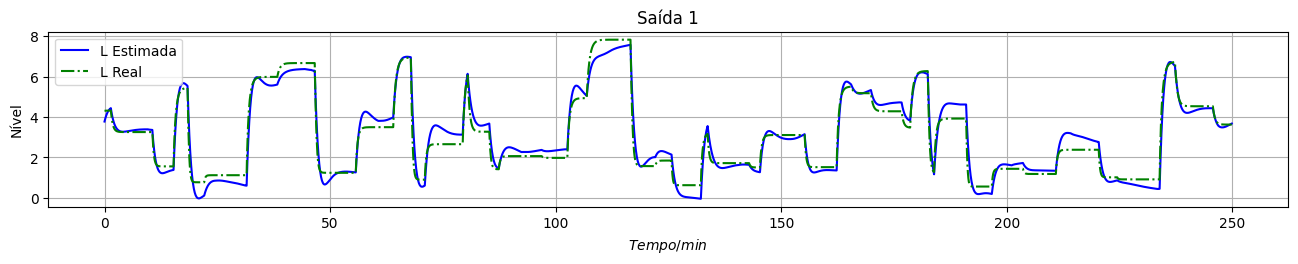

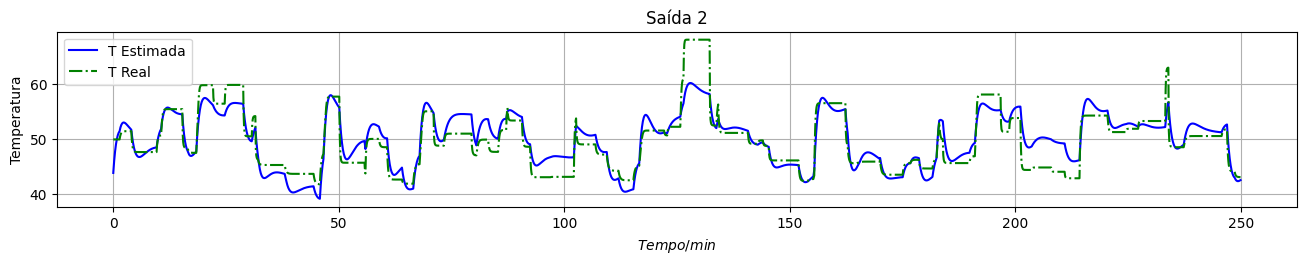

R²: [0.9572047767395464, 0.7819359077168035]
NRMSE: [0.05556854988587223, 0.09711721569018206]


In [190]:
Y_pred = BCS_model.run(X_test)

Y_pred = scaler_out.inverse_transform(Y_pred)
Y_test = scaler_out.inverse_transform(Y_test)
t_ = np.arange(0, t_final/2, dt)

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1) 
plt.title("Saída 1")
plt.xlabel("$Tempo/min$")
plt.ylabel("Nível")
plt.plot(t_, Y_pred[:,0], label="L Estimada", color="blue", linestyle="-")
plt.plot(t_, Y_test[:,0], label="L Real", color="g", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 2) 
plt.title("Saída 2")
plt.xlabel("$Tempo/min$")
plt.ylabel("Temperatura")
plt.plot(t_, Y_pred[:,1], label="T Estimada", color="blue", linestyle="-")
plt.plot(t_, Y_test[:,1], label="T Real", color="g", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

R2_1 = r2_score(Y_test[:,0], Y_pred[:,0])
R2_2 = r2_score(Y_test[:,1], Y_pred[:,1])
R2  = [R2_1, R2_2]
print(f"R²: {R2}")

rmse_1 = NRMSE(Y_test[:,0], Y_pred[:,0])
rmse_2 = NRMSE(Y_test[:,1], Y_pred[:,1])
nrmse = [float(rmse_1), float(rmse_2)]
print(f"NRMSE: {nrmse}")